# Congressional Voting

URL : https://www.kaggle.com/c/184702-tu-ml-ss-20-congressional-voting

This data set includes United States Congressional Voting Records; Classify as Republican or Democrat

Number of Instances: **218**

Attribute Characteristics: **categorical**

Number of Attributes: **18**

Missing Values: **211**

Target variable: **class**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import time

from sklearn import preprocessing
from sklearn import model_selection

from sklearn.model_selection import KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

import seaborn as sns

%matplotlib inline

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/184702-tu-ml-ss-20-congressional-voting/CongressionalVotingID.shuf.test.csv
/kaggle/input/184702-tu-ml-ss-20-congressional-voting/CongressionalVotingID.shuf.sampleSubmission.csv
/kaggle/input/184702-tu-ml-ss-20-congressional-voting/CongressionalVotingID.shuf.train.csv


In [3]:
cvoting_train = pd.read_csv("/kaggle/input/184702-tu-ml-ss-20-congressional-voting/CongressionalVotingID.shuf.train.csv", sep=',')
test = pd.read_csv("/kaggle/input/184702-tu-ml-ss-20-congressional-voting/CongressionalVotingID.shuf.test.csv", sep=',')

In [4]:
cvoting_train.head()

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,134,republican,n,n,n,y,y,y,n,n,n,y,n,y,y,y,n,y
1,224,republican,n,n,n,y,y,n,n,n,n,n,n,y,y,y,n,y
2,32,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,unknown
3,171,democrat,y,n,y,n,n,n,unknown,y,y,unknown,n,n,n,n,y,unknown
4,333,democrat,y,n,y,n,n,n,y,y,y,n,y,n,n,n,y,unknown


In [5]:
test.head()

,ID,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,368,y,y,y,n,y,y,y,y,n,y,y,n,n,n,y,unknown
1,15,n,y,n,y,y,y,n,n,n,n,n,y,unknown,unknown,n,unknown
2,94,y,n,y,n,n,n,y,n,y,y,y,n,n,n,y,y
3,107,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
4,285,n,n,y,n,n,y,y,y,y,y,y,n,n,n,unknown,y


In [6]:
cvoting_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   ID                                      218 non-null    int64 
 1   class                                   218 non-null    object
 2   handicapped-infants                     218 non-null    object
 3   water-project-cost-sharing              218 non-null    object
 4   adoption-of-the-budget-resolution       218 non-null    object
 5   physician-fee-freeze                    218 non-null    object
 6   el-salvador-aid                         218 non-null    object
 7   religious-groups-in-schools             218 non-null    object
 8   anti-satellite-test-ban                 218 non-null    object
 9   aid-to-nicaraguan-contras               218 non-null    object
 10  mx-missile                              218 non-null    object
 11  immigr

In [7]:
cvoting_train.drop(["ID"], axis=1, inplace=True)
cvoting_test = test.drop(["ID"], axis=1, inplace=False)

In [8]:
cvoting_train.replace('unknown', np.NaN, inplace=True)
cvoting_test.replace('unknown', np.NaN, inplace=True)

print("Total number of missing values:", cvoting_train.isna().sum().sum())
display(cvoting_train.isna().sum())

Total number of missing values: 211


class                                      0
handicapped-infants                        5
water-project-cost-sharing                30
adoption-of-the-budget-resolution          6
physician-fee-freeze                       5
el-salvador-aid                           10
religious-groups-in-schools                8
anti-satellite-test-ban                   11
aid-to-nicaraguan-contras                  7
mx-missile                                12
immigration                                4
synfuels-crporation-cutback               10
education-spending                        20
superfund-right-to-sue                    10
crime                                      8
duty-free-exports                         14
export-administration-act-south-africa    51
dtype: int64

In [9]:
for col in cvoting_train:
    print("==================================")
    print("Count of distinct categories:", cvoting_train[col].value_counts().count())
    print(cvoting_train[col].value_counts())

Count of distinct categories: 2
democrat      137
republican     81
Name: class, dtype: int64
Count of distinct categories: 2
n    113
y    100
Name: handicapped-infants, dtype: int64
Count of distinct categories: 2
y    102
n     86
Name: water-project-cost-sharing, dtype: int64
Count of distinct categories: 2
y    132
n     80
Name: adoption-of-the-budget-resolution, dtype: int64
Count of distinct categories: 2
n    128
y     85
Name: physician-fee-freeze, dtype: int64
Count of distinct categories: 2
y    107
n    101
Name: el-salvador-aid, dtype: int64
Count of distinct categories: 2
y    131
n     79
Name: religious-groups-in-schools, dtype: int64
Count of distinct categories: 2
y    116
n     91
Name: anti-satellite-test-ban, dtype: int64
Count of distinct categories: 2
y    120
n     91
Name: aid-to-nicaraguan-contras, dtype: int64
Count of distinct categories: 2
n    104
y    102
Name: mx-missile, dtype: int64
Count of distinct categories: 2
y    111
n    103
Name: immigration, 

In [10]:
# We will replace all null values with mode (most frequent values in that column)
cvoting_train = cvoting_train.apply(lambda col: col.fillna(col.value_counts().index[0]))
cvoting_test = cvoting_test.apply(lambda col: col.fillna(col.value_counts().index[0]))

In [11]:
print("Total number of missing values in train dataset:", cvoting_train.isna().sum().sum())
print("Total number of missing values in test dataset:", cvoting_test.isna().sum().sum())

Total number of missing values in train dataset: 0
Total number of missing values in test dataset: 0


In [12]:
for col in cvoting_train.columns:
    if isinstance(cvoting_train[col], object):
        cvoting_train[col] = cvoting_train[col].astype('category')
for col in cvoting_test.columns:
    if isinstance(cvoting_test[col], object):
        cvoting_test[col] = cvoting_test[col].astype('category')

In [13]:
cvoting_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   class                                   218 non-null    category
 1   handicapped-infants                     218 non-null    category
 2   water-project-cost-sharing              218 non-null    category
 3   adoption-of-the-budget-resolution       218 non-null    category
 4   physician-fee-freeze                    218 non-null    category
 5   el-salvador-aid                         218 non-null    category
 6   religious-groups-in-schools             218 non-null    category
 7   anti-satellite-test-ban                 218 non-null    category
 8   aid-to-nicaraguan-contras               218 non-null    category
 9   mx-missile                              218 non-null    category
 10  immigration                             218 non-nu

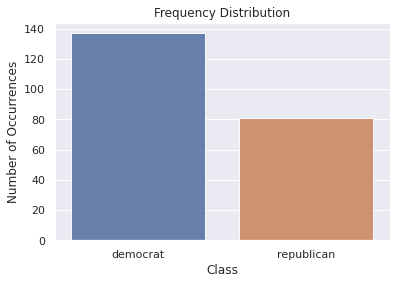

In [14]:
classes_count = cvoting_train['class'].value_counts()
sns.set(style="darkgrid")
sns.barplot(classes_count.index, classes_count.values, alpha=0.9)
plt.title('Frequency Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.show()

In [15]:
cvoting_train = cvoting_train.apply(lambda col: col.cat.codes)
cvoting_test = cvoting_test.apply(lambda col: col.cat.codes)

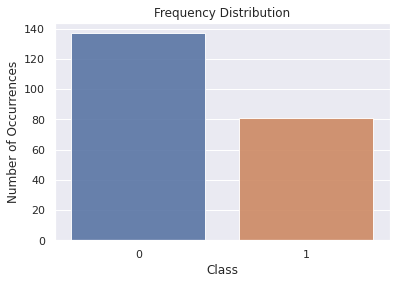

In [16]:
classes_count = cvoting_train['class'].value_counts()
sns.set(style="darkgrid")
sns.barplot(classes_count.index, classes_count.values, alpha=0.9)
plt.title('Frequency Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.show()

In [17]:
cvoting_train.head()

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,1,0,0,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,1,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1
2,0,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
3,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1
4,0,1,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1


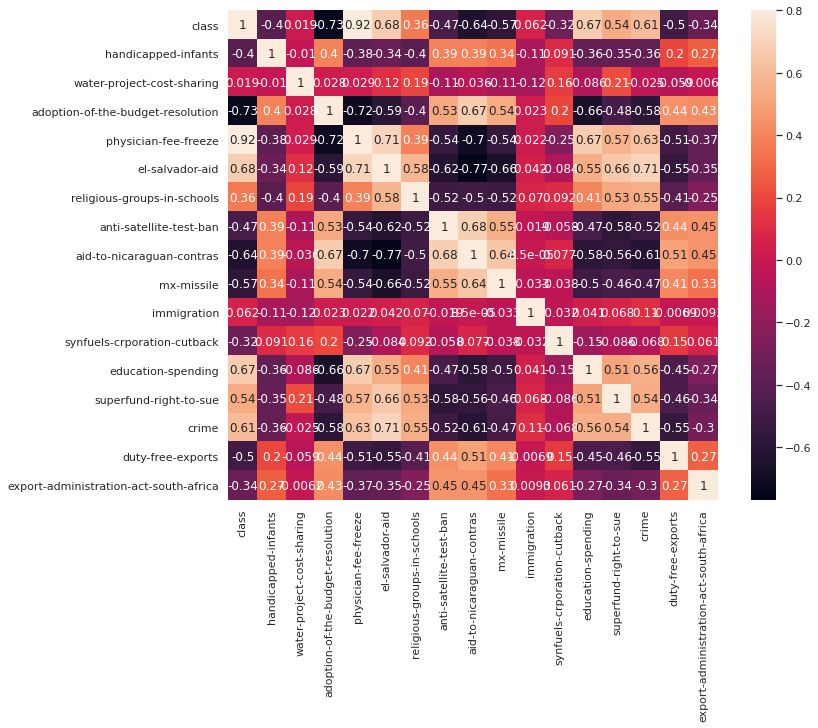

In [18]:
correlation_matrix = cvoting_train.corr()
plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix, vmax=0.8, square=True, annot=True)
plt.show()

In [19]:
dups = cvoting_train.duplicated()
print('Number of duplicate rows in train dataset = %d' % (dups.sum()))

print('Number of rows before discarding duplicates in train dataset = %d' % (cvoting_train.shape[0]))
cvoting_train = cvoting_train.drop_duplicates()
print('Number of rows after discarding duplicates in train dataset = %d' % (cvoting_train.shape[0]))

Number of duplicate rows in train dataset = 61
Number of rows before discarding duplicates in train dataset = 218
Number of rows after discarding duplicates in train dataset = 157


In [20]:
X = cvoting_train.drop(['class'], axis=1)
y = cvoting_train['class']

print("cvoting_train.shape: {} X.shape: {} y.shape: {}".format(cvoting_train.shape, X.shape, y.shape))

cvoting_train.shape: (157, 17) X.shape: (157, 16) y.shape: (157,)


In [21]:
X.head(10)

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,0,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1
2,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
3,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1
4,1,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1
5,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1
7,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
8,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1
9,0,1,1,0,0,1,1,1,0,1,0,0,0,0,0,1
10,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,1


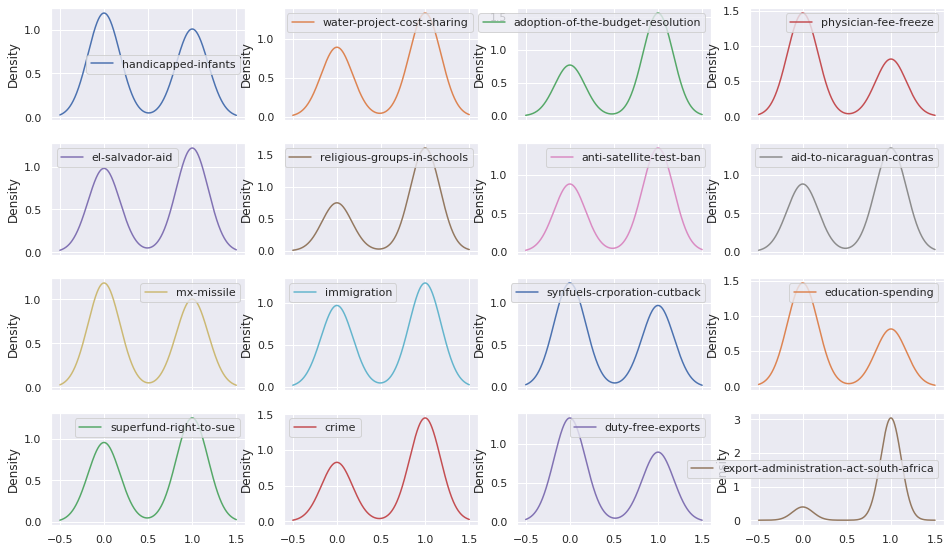

In [22]:
X.plot(kind='density', subplots=True, layout=(5, 4), figsize=(16,12))
plt.show()

### Modeling and Evaluation

We will be testing our models by using two types of data:
- Binary data and
- Standardized data (using StandardScaler)

In [23]:
randNum = 123

In [24]:
from sklearn.dummy import DummyClassifier

dummy_clf_mf = DummyClassifier(strategy="most_frequent", random_state=randNum)
dummy_clf_mf.fit(X, y)
dummy_clf_mf.predict(X)
print("Most frequent baseline classifier score:", dummy_clf_mf.score(X, y))

dummy_clf_u = DummyClassifier(strategy="uniform", random_state=randNum)
dummy_clf_u.fit(X, y)
dummy_clf_u.predict(X)
print("Uniform baseline classifier score:", dummy_clf_u.score(X, y))

Most frequent baseline classifier score: 0.6751592356687898
Uniform baseline classifier score: 0.47770700636942676


From our baseline classifiers we see that the distribution of values in the targeted variable is unbalanced. The score that we need to beat is `67.5%`

In [25]:
from sklearn.preprocessing import StandardScaler

X_ss = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X), columns=X.columns)

print("X shape %s X_ss shape %s" % (X.shape, X_ss.shape))

X shape (157, 16) X_ss shape (157, 16)


In [26]:
# Use 80% of the data to train the models and the remaining for testing/validation

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=randNum)
print("X_train.shape: {} y_train.shape: {}".format(X_train.shape, y_train.shape))
print("X_test.shape: {} y_test.shape: {}".format(X_test.shape, y_test.shape))

X_train_ss, X_test_ss, y_train_ss, y_test_ss = model_selection.train_test_split(X_ss, y, test_size=0.2, random_state=randNum)
print("X_train_ss.shape: {} y_train_ss.shape: {}".format(X_train_ss.shape, y_train_ss.shape))
print("X_test_ss.shape: {} y_test_ss.shape: {}".format(X_test_ss.shape, y_test_ss.shape))

X_train.shape: (125, 16) y_train.shape: (125,)
X_test.shape: (32, 16) y_test.shape: (32,)
X_train_ss.shape: (125, 16) y_train_ss.shape: (125,)
X_test_ss.shape: (32, 16) y_test_ss.shape: (32,)


In [27]:
scoring = {'accuracy': make_scorer(accuracy_score), 
           'precision': make_scorer(precision_score), 
           'recall': make_scorer(recall_score), 
           'f1': make_scorer(f1_score)}

data_to_fit = [("Binary data", X_train, X_test, y_train, y_test),
               ("Standardized data", X_train_ss, X_test_ss, y_train_ss, y_test_ss)]

holdOutSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=randNum)
kfoldSplit = KFold(n_splits=10, random_state=randNum, shuffle=True)

def show_results(grid_results, titlePlot):
    results = pd.DataFrame(grid_results.cv_results_['params'])
    results['Accuracy Score'] = grid_results.cv_results_['mean_test_accuracy']
    results['Precision'] = grid_results.cv_results_['mean_test_precision']
    results['Recall'] = grid_results.cv_results_['mean_test_recall']
    results['F1'] = grid_results.cv_results_['mean_test_f1']
    results['Runtime'] = grid_results.cv_results_['mean_fit_time']
    results = results.sort_values(['Runtime'], ascending=True).sort_values(['Accuracy Score', 'Precision', 'Recall', 'F1'], ascending=False).reset_index(drop = True)
    display(results)
    
    results['params'] = results[results.columns[0:results.shape[1]-5]].apply(lambda x: ', '.join(x.astype(str)), axis=1)

    fig, ax = plt.subplots(figsize=(14, 9))
    iterator = 1
    for combination, acc_score in zip(results['params'], results['Accuracy Score']):
        ax.scatter(iterator, acc_score, label=combination, s=65, edgecolors='none')
        iterator += 1
    ax.legend(title=", ".join(results.iloc[:, 0:results.shape[1]-6]), fontsize='small')
    ax.grid(which='major', linestyle='-', linewidth='0.2', color='gray')
    ax.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
    plt.xlabel('Model')
    plt.ylabel('Accuracy Score')
    plt.title(titlePlot)
    plt.show()

Best score: 0.960000 using {'C': 0.1, 'fit_intercept': False, 'penalty': 'l2'}
Accuracy score in testing data: 0.96875
Model tuning time: 1.65s


,C,fit_intercept,penalty,Accuracy Score,Precision,Recall,F1,Runtime
0,0.10,False,l2,0.96,1.000000,0.875,0.933333,0.004375
1,0.10,False,l1,0.92,1.000000,0.750,0.857143,0.003806
2,0.10,True,l1,0.92,1.000000,0.750,0.857143,0.003855
3,0.05,True,l2,0.92,1.000000,0.750,0.857143,0.003867
4,0.10,True,l2,0.92,1.000000,0.750,0.857143,0.004054
5,0.05,False,l2,0.92,1.000000,0.750,0.857143,0.004272
6,5.00,True,l2,0.92,0.875000,0.875,0.875000,0.003774
7,1.00,False,l2,0.92,0.875000,0.875,0.875000,0.003830
8,0.50,True,l2,0.92,0.875000,0.875,0.875000,0.004060
9,5.00,False,l2,0.92,0.875000,0.875,0.875000,0.004070


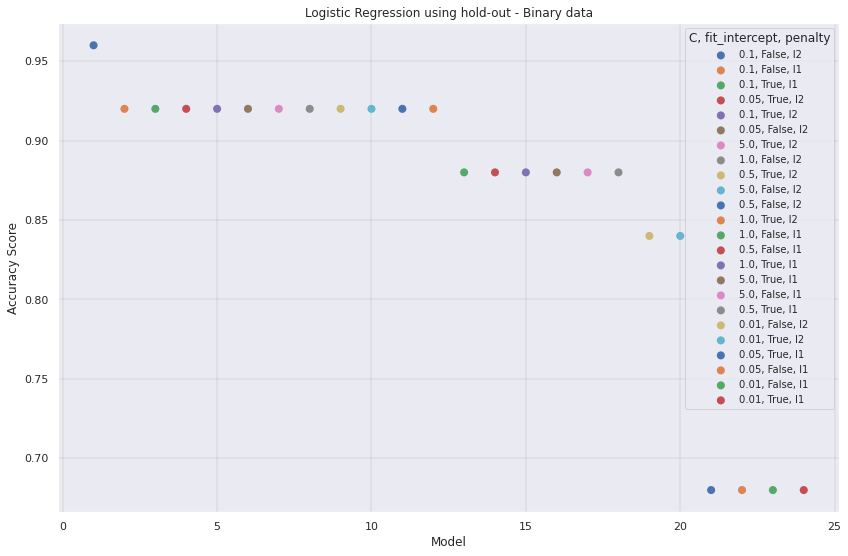

Best score: 0.920000 using {'C': 1.0, 'fit_intercept': True, 'penalty': 'l2'}
Accuracy score in testing data: 0.96875
Model tuning time: 0.12s


,C,fit_intercept,penalty,Accuracy Score,Precision,Recall,F1,Runtime
0,5.00,True,l2,0.92,0.875000,0.875,0.875000,0.003022
1,1.00,True,l2,0.92,0.875000,0.875,0.875000,0.004064
2,0.05,False,l1,0.88,0.777778,0.875,0.823529,0.003010
3,0.10,False,l1,0.88,0.777778,0.875,0.823529,0.003260
4,5.00,True,l1,0.88,0.777778,0.875,0.823529,0.003723
5,0.50,False,l2,0.88,0.777778,0.875,0.823529,0.003883
6,1.00,False,l2,0.88,0.777778,0.875,0.823529,0.003981
7,1.00,True,l1,0.88,0.777778,0.875,0.823529,0.004035
8,0.05,True,l1,0.88,0.777778,0.875,0.823529,0.004037
9,0.05,True,l2,0.88,0.777778,0.875,0.823529,0.004167


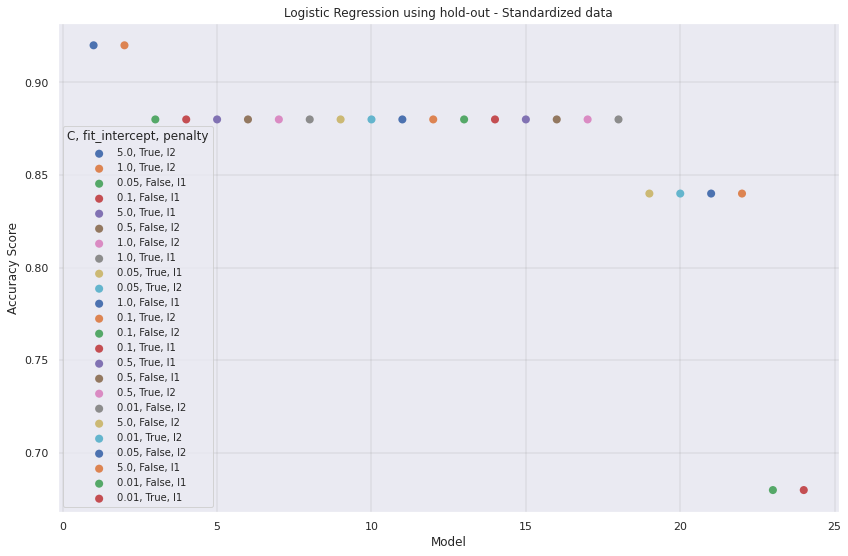

In [28]:
# Tuning algorithm - Logistic Regression Hold-out

for label, X_train, X_test, y_train, y_test in data_to_fit:
    t0 = time.time()
    paramGridLR_h = dict(penalty=np.array(["l1", "l2"]),
                         C=np.array([0.01, 0.05, 0.1, 0.5, 1, 5]),
                         fit_intercept=np.array([False, True]))

    modelLR_h = LogisticRegression(solver="liblinear", random_state=randNum)
    gridLR_h = GridSearchCV(estimator=modelLR_h,
                            param_grid=paramGridLR_h,
                            cv=holdOutSplit,
                            scoring=scoring,
                            refit='accuracy',
                            n_jobs=-1)
    grid_result_LR_h = gridLR_h.fit(X_train, y_train)

    print("Best score: %f using %s" % (grid_result_LR_h.best_score_, grid_result_LR_h.best_params_))
    print("Accuracy score in testing data:", (grid_result_LR_h.score(X_test, y_test)))
    print ('Model tuning time: %.2fs' % (time.time() - t0))
    show_results(grid_result_LR_h, 'Logistic Regression using hold-out - ' + label)

Best score: 0.960256 using {'C': 5.0, 'fit_intercept': False, 'penalty': 'l1'}
Accuracy score in testing data: 0.90625
Model tuning time: 0.90s


,C,fit_intercept,penalty,Accuracy Score,Precision,Recall,F1,Runtime
0,5.00,False,l1,0.960256,0.921667,0.946667,0.930159,0.004490
1,5.00,True,l1,0.960256,0.921667,0.946667,0.930159,0.005265
2,1.00,False,l1,0.943590,0.905000,0.926667,0.907179,0.004172
3,0.50,True,l1,0.943590,0.905000,0.926667,0.907179,0.004250
4,1.00,True,l1,0.943590,0.905000,0.926667,0.907179,0.004356
5,0.50,False,l1,0.943590,0.905000,0.926667,0.907179,0.004386
6,0.50,False,l2,0.943590,0.896667,0.926667,0.901984,0.003943
7,0.50,True,l2,0.943590,0.896667,0.926667,0.901984,0.004084
8,1.00,True,l2,0.943590,0.896667,0.926667,0.901984,0.004319
9,5.00,False,l2,0.943590,0.896667,0.926667,0.901984,0.004397


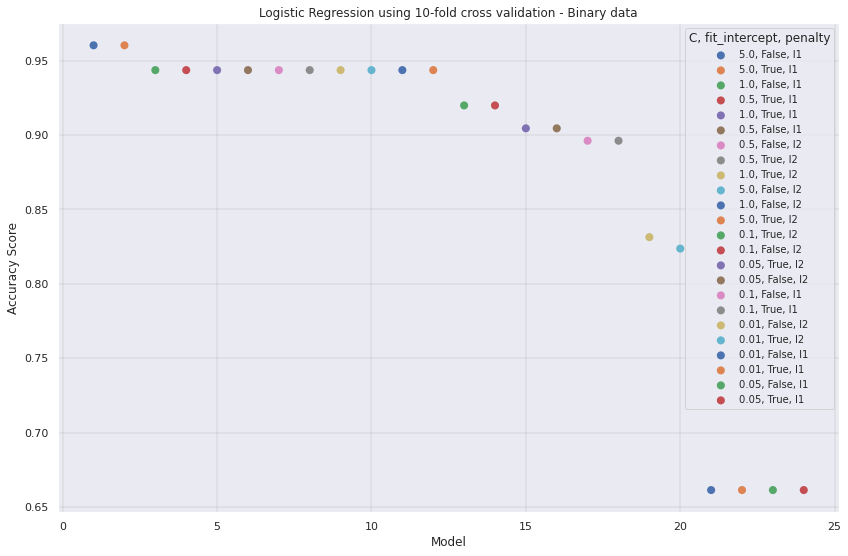

Best score: 0.959615 using {'C': 0.05, 'fit_intercept': False, 'penalty': 'l1'}
Accuracy score in testing data: 0.9375
Model tuning time: 0.91s


,C,fit_intercept,penalty,Accuracy Score,Precision,Recall,F1,Runtime
0,1.00,True,l1,0.959615,0.921667,0.946667,0.930159,0.004276
1,0.05,True,l1,0.959615,0.913333,0.980000,0.940115,0.003809
2,0.10,False,l1,0.959615,0.913333,0.980000,0.940115,0.003842
3,0.50,True,l1,0.959615,0.913333,0.980000,0.940115,0.004026
4,0.05,False,l1,0.959615,0.913333,0.980000,0.940115,0.004081
5,0.10,True,l1,0.959615,0.913333,0.980000,0.940115,0.006062
6,0.50,True,l2,0.951923,0.896667,0.946667,0.915873,0.004120
7,0.50,False,l1,0.951282,0.899048,0.980000,0.932423,0.005152
8,5.00,True,l1,0.944231,0.913333,0.896667,0.902020,0.004125
9,1.00,True,l2,0.943590,0.876667,0.946667,0.906984,0.003747


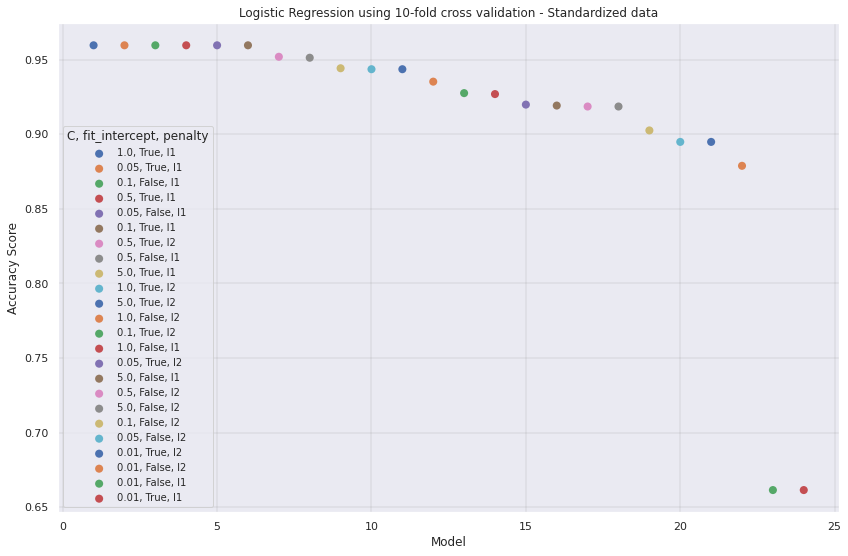

In [29]:
# Tuning algorithm - Logistic Regression 10-fold CV

for label, X_train, X_test, y_train, y_test in data_to_fit:
    t0 = time.time()
    paramGridLR_cv = dict(penalty=np.array(["l1", "l2"]),
                          C=np.array([0.01, 0.05, 0.1, 0.5, 1, 5]),
                          fit_intercept=np.array([False, True]))
    
    modelLR_cv = LogisticRegression(solver="liblinear", random_state=randNum)
    gridLR_cv = GridSearchCV(estimator=modelLR_cv,
                             param_grid=paramGridLR_cv,
                             cv=kfoldSplit,
                             scoring=scoring,
                             refit='accuracy',
                             n_jobs=-1)
    grid_result_LR_cv = gridLR_cv.fit(X_train, y_train)
    
    print("Best score: %f using %s" % (grid_result_LR_cv.best_score_, grid_result_LR_cv.best_params_))
    print("Accuracy score in testing data:", (grid_result_LR_cv.score(X_test, y_test)))
    print ('Model tuning time: %.2fs' % (time.time() - t0))
    show_results(grid_result_LR_cv, 'Logistic Regression using 10-fold cross validation - ' + label)

Best score: 0.960000 using {'C': 0.01, 'fit_intercept': False}
Accuracy score in testing data: 0.9375
Model tuning time: 0.08s


,C,fit_intercept,Accuracy Score,Precision,Recall,F1,Runtime
0,0.01,False,0.96,1.000000,0.875,0.933333,0.003997
1,0.01,True,0.96,1.000000,0.875,0.933333,0.004373
2,5.00,False,0.92,0.875000,0.875,0.875000,0.003695
3,1.00,False,0.92,0.875000,0.875,0.875000,0.003943
4,0.05,False,0.92,0.875000,0.875,0.875000,0.004243
5,1.00,True,0.92,0.875000,0.875,0.875000,0.004314
6,5.00,True,0.92,0.875000,0.875,0.875000,0.004508
7,0.05,True,0.92,0.875000,0.875,0.875000,0.004517
8,0.10,True,0.88,0.777778,0.875,0.823529,0.002899
9,0.50,True,0.88,0.777778,0.875,0.823529,0.003456


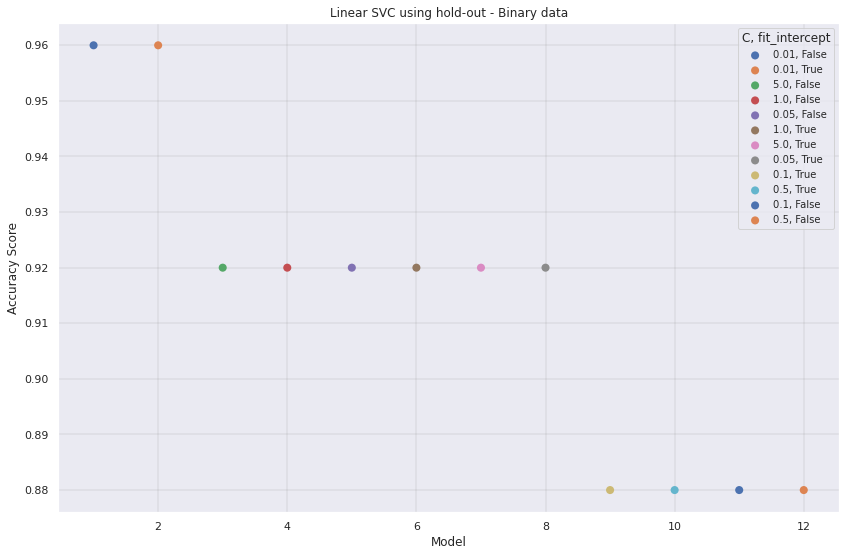

Best score: 0.880000 using {'C': 0.01, 'fit_intercept': False}
Accuracy score in testing data: 0.84375
Model tuning time: 0.08s


,C,fit_intercept,Accuracy Score,Precision,Recall,F1,Runtime
0,1.00,True,0.88,0.777778,0.875,0.823529,0.003289
1,5.00,True,0.88,0.777778,0.875,0.823529,0.003846
2,0.01,False,0.88,0.777778,0.875,0.823529,0.003865
3,0.50,True,0.88,0.777778,0.875,0.823529,0.004165
4,0.10,False,0.88,0.777778,0.875,0.823529,0.004170
5,0.10,True,0.88,0.777778,0.875,0.823529,0.004256
6,0.01,True,0.88,0.777778,0.875,0.823529,0.004328
7,0.05,True,0.88,0.777778,0.875,0.823529,0.004362
8,0.05,False,0.88,0.777778,0.875,0.823529,0.007975
9,0.50,False,0.84,0.700000,0.875,0.777778,0.003068


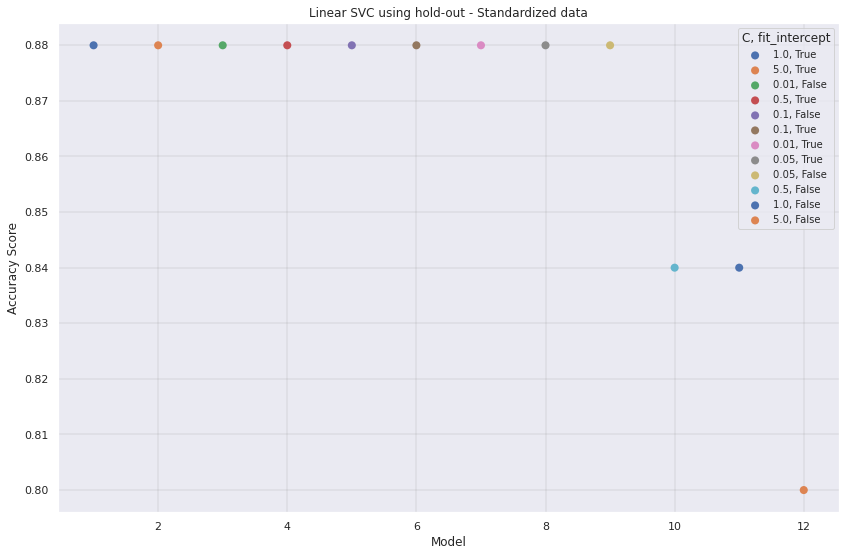

In [30]:
# Tuning algorithm - LinearSVC Hold-Out

for label, X_train, X_test, y_train, y_test in data_to_fit:
    t0 = time.time()
    paramGridLinearSVC_h = dict(fit_intercept=np.array([False, True]),
                                C=np.array([0.01, 0.05, 0.1, 0.5, 1, 5]))
    
    modelLinearSVC_h = LinearSVC(penalty="l2", max_iter=1e6, random_state=randNum)
    gridLinearSVC_h = GridSearchCV(estimator=modelLinearSVC_h,
                                   param_grid=paramGridLinearSVC_h,
                                   cv=holdOutSplit,
                                   scoring=scoring,
                                   refit='accuracy',
                                   n_jobs=-1)
    grid_result_LinearSVC_h = gridLinearSVC_h.fit(X_train, y_train)
    
    print("Best score: %f using %s" % (grid_result_LinearSVC_h.best_score_, grid_result_LinearSVC_h.best_params_))
    print("Accuracy score in testing data:", (grid_result_LinearSVC_h.score(X_test, y_test)))
    print ('Model tuning time: %.2fs' % (time.time() - t0))
    show_results(grid_result_LinearSVC_h, 'Linear SVC using hold-out - ' + label)

Best score: 0.951923 using {'C': 0.5, 'fit_intercept': False}
Accuracy score in testing data: 0.9375
Model tuning time: 0.45s


,C,fit_intercept,Accuracy Score,Precision,Recall,F1,Runtime
0,5.00,False,0.951923,0.926667,0.913333,0.915556,0.004723
1,0.50,False,0.951923,0.896667,0.946667,0.915873,0.005377
2,0.50,True,0.951923,0.896667,0.946667,0.915873,0.005717
3,0.05,False,0.943590,0.896667,0.926667,0.901984,0.003728
4,0.10,False,0.943590,0.896667,0.926667,0.901984,0.003961
5,0.10,True,0.943590,0.896667,0.926667,0.901984,0.003986
6,0.05,True,0.943590,0.896667,0.926667,0.901984,0.006320
7,1.00,False,0.943590,0.876667,0.946667,0.906984,0.004298
8,1.00,True,0.943590,0.876667,0.946667,0.906984,0.004739
9,5.00,True,0.935256,0.921667,0.876667,0.893131,0.004961


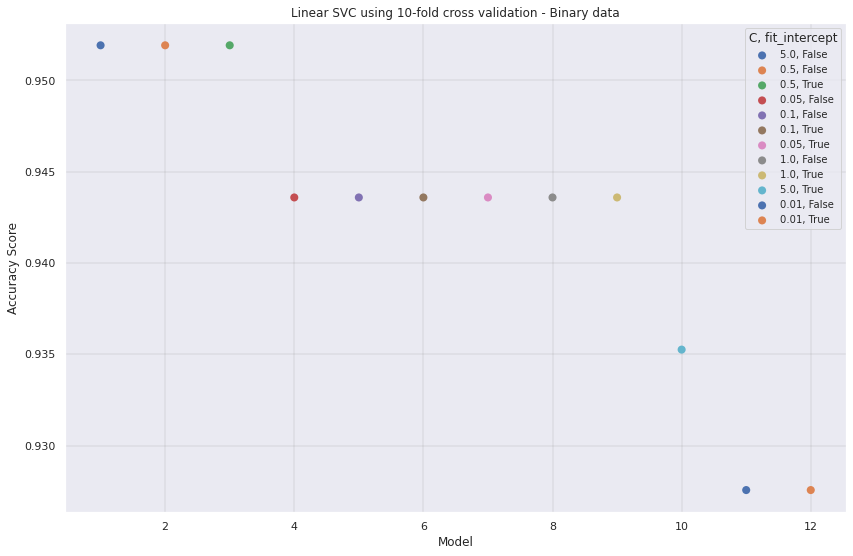

Best score: 0.951923 using {'C': 0.1, 'fit_intercept': True}
Accuracy score in testing data: 0.96875
Model tuning time: 0.50s


,C,fit_intercept,Accuracy Score,Precision,Recall,F1,Runtime
0,0.10,True,0.951923,0.896667,0.946667,0.915873,0.005089
1,0.50,True,0.944231,0.893333,0.913333,0.902222,0.006226
2,0.05,True,0.944231,0.880000,0.946667,0.906782,0.004326
3,1.00,True,0.935897,0.893333,0.896667,0.893131,0.004758
4,0.01,True,0.935897,0.865714,0.946667,0.899090,0.004235
5,5.00,True,0.927564,0.888333,0.876667,0.879798,0.004966
6,0.05,False,0.926923,0.840714,0.980000,0.900360,0.003700
7,0.10,False,0.926923,0.840714,0.980000,0.900360,0.003965
8,1.00,False,0.926923,0.834524,1.000000,0.903996,0.006187
9,5.00,False,0.919231,0.814048,1.000000,0.889840,0.011954


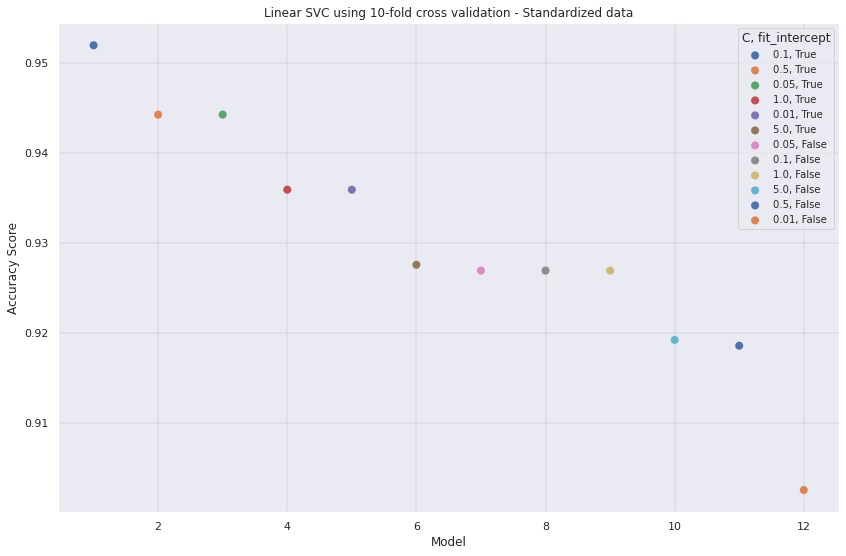

In [31]:
# Tuning algorithm - LinearSVC 10-fold CV

for label, X_train, X_test, y_train, y_test in data_to_fit:
    t0 = time.time()
    paramGridLinearSVC_cv = dict(fit_intercept=np.array([False, True]),
                                 C=np.array([0.01, 0.05, 0.1, 0.5, 1, 5]))

    modelLinearSVC_cv = LinearSVC(penalty="l2", max_iter=1e6, random_state=randNum)
    gridLinearSVC_cv = GridSearchCV(estimator=modelLinearSVC_cv,
                                    param_grid=paramGridLinearSVC_cv,
                                    cv=kfoldSplit,
                                    scoring=scoring,
                                    refit='accuracy',
                                    n_jobs=-1)
    grid_result_LinearSVC_cv = gridLinearSVC_cv.fit(X_train, y_train)

    print("Best score: %f using %s" % (grid_result_LinearSVC_cv.best_score_, grid_result_LinearSVC_cv.best_params_))
    print("Accuracy score in testing data:", (grid_result_LinearSVC_cv.score(X_test, y_test)))
    print ('Model tuning time: %.2fs' % (time.time() - t0))
    show_results(grid_result_LinearSVC_cv, 'Linear SVC using 10-fold cross validation - ' + label)

Best score: 0.880000 using {'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'n_estimators': 100}
Accuracy score in testing data: 0.9375
Model tuning time: 2.24s


,bootstrap,criterion,max_depth,n_estimators,Accuracy Score,Precision,Recall,F1,Runtime
0,False,entropy,5,50,0.88,0.857143,0.750,0.800000,0.157337
1,False,gini,5,50,0.88,0.857143,0.750,0.800000,0.158644
2,True,entropy,5,50,0.88,0.857143,0.750,0.800000,0.252518
3,True,gini,5,50,0.88,0.857143,0.750,0.800000,0.262388
4,False,gini,5,100,0.88,0.857143,0.750,0.800000,0.304131
5,False,entropy,5,100,0.88,0.857143,0.750,0.800000,0.304219
6,True,gini,5,100,0.88,0.857143,0.750,0.800000,0.398559
7,True,entropy,5,100,0.88,0.857143,0.750,0.800000,0.401600
8,False,gini,3,100,0.88,0.777778,0.875,0.823529,0.317890
9,True,gini,3,100,0.88,0.777778,0.875,0.823529,0.400649


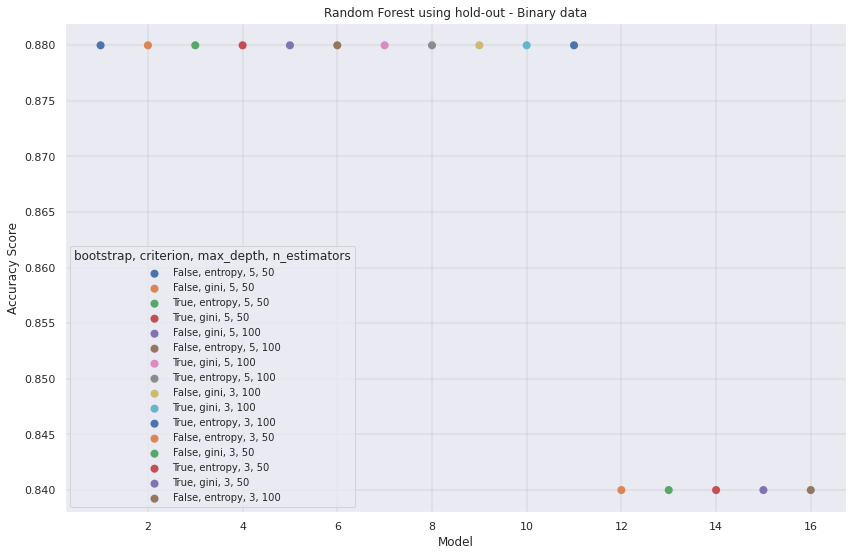

Best score: 0.880000 using {'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'n_estimators': 100}
Accuracy score in testing data: 0.9375
Model tuning time: 2.32s


,bootstrap,criterion,max_depth,n_estimators,Accuracy Score,Precision,Recall,F1,Runtime
0,False,entropy,5,50,0.88,0.857143,0.750,0.800000,0.154806
1,False,gini,5,50,0.88,0.857143,0.750,0.800000,0.218157
2,True,gini,5,50,0.88,0.857143,0.750,0.800000,0.271220
3,True,entropy,5,50,0.88,0.857143,0.750,0.800000,0.289237
4,False,entropy,5,100,0.88,0.857143,0.750,0.800000,0.296197
5,True,entropy,5,100,0.88,0.857143,0.750,0.800000,0.419671
6,True,gini,5,100,0.88,0.857143,0.750,0.800000,0.420040
7,False,gini,5,100,0.88,0.857143,0.750,0.800000,0.431109
8,True,entropy,3,100,0.88,0.777778,0.875,0.823529,0.400566
9,False,gini,3,100,0.88,0.777778,0.875,0.823529,0.413305


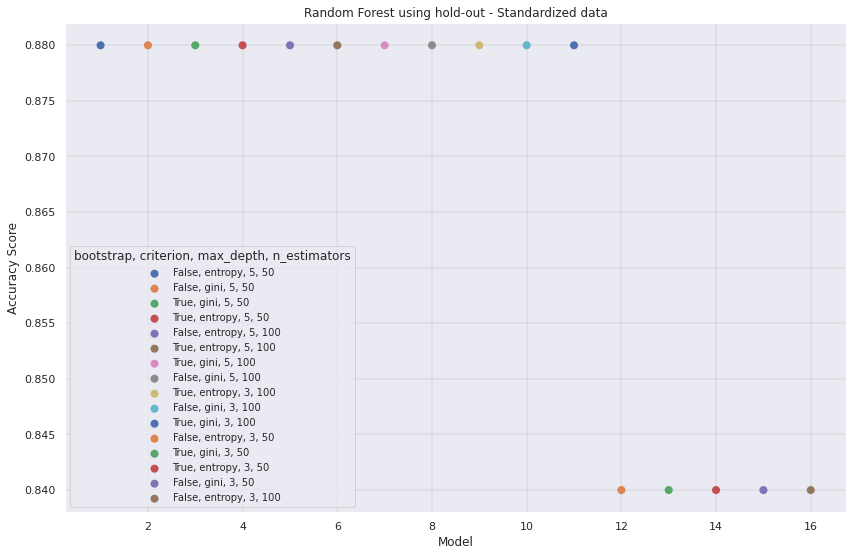

In [32]:
# Tuning algorithm - Random Forest Hold-Out

for label, X_train, X_test, y_train, y_test in data_to_fit:
    t0 = time.time()
    paramGridRF_h = dict(n_estimators=np.array([50, 100]),
                         criterion=np.array(["gini", "entropy"]),
                         max_depth=np.array([3, 5]),
                         bootstrap=np.array([False, True]))

    modelRF_h = RandomForestClassifier(n_jobs=-1, random_state=randNum)
    gridRF_h = GridSearchCV(estimator=modelRF_h,
                            param_grid=paramGridRF_h,
                            cv=holdOutSplit,
                            scoring=scoring,
                            refit='accuracy', 
                            n_jobs=-1)
    grid_result_RF_h = gridRF_h.fit(X_train, y_train)

    print("Best score: %f using %s" % (grid_result_RF_h.best_score_, grid_result_RF_h.best_params_))
    print("Accuracy score in testing data:", (grid_result_RF_h.score(X_test, y_test)))
    print ('Model tuning time: %.2fs' % (time.time() - t0))
    show_results(grid_result_RF_h, 'Random Forest using hold-out - ' + label)

Best score: 0.959615 using {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'n_estimators': 50}
Accuracy score in testing data: 0.9375
Model tuning time: 16.73s


,bootstrap,criterion,max_depth,n_estimators,Accuracy Score,Precision,Recall,F1,Runtime
0,True,gini,3,50,0.959615,0.921667,0.946667,0.930159,0.254196
1,False,gini,3,100,0.951923,0.905000,0.946667,0.921068,0.316895
2,True,entropy,3,50,0.951282,0.921667,0.930000,0.921068,0.253055
3,True,gini,5,100,0.951282,0.921667,0.930000,0.921068,0.400346
4,True,entropy,5,100,0.951282,0.921667,0.930000,0.921068,0.413964
5,False,gini,5,100,0.951282,0.921667,0.930000,0.921068,0.314323
6,False,gini,3,50,0.943590,0.905000,0.930000,0.911977,0.158408
7,False,entropy,3,50,0.943590,0.905000,0.930000,0.911977,0.163786
8,False,entropy,3,100,0.943590,0.905000,0.930000,0.911977,0.300429
9,True,entropy,3,100,0.943590,0.905000,0.930000,0.911977,0.399557


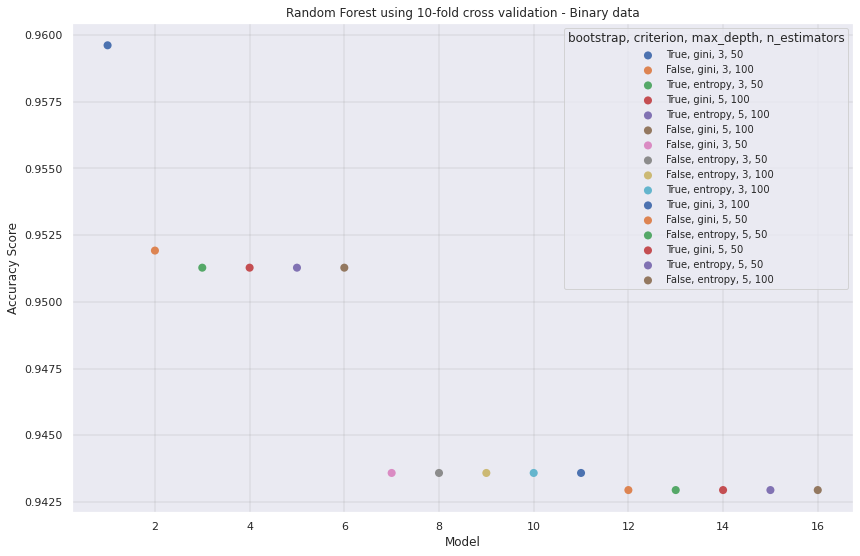

Best score: 0.959615 using {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'n_estimators': 50}
Accuracy score in testing data: 0.9375
Model tuning time: 16.51s


,bootstrap,criterion,max_depth,n_estimators,Accuracy Score,Precision,Recall,F1,Runtime
0,True,gini,3,50,0.959615,0.921667,0.946667,0.930159,0.254358
1,False,gini,3,100,0.951923,0.905000,0.946667,0.921068,0.307397
2,True,entropy,3,50,0.951282,0.921667,0.930000,0.921068,0.253796
3,True,gini,5,100,0.951282,0.921667,0.930000,0.921068,0.407652
4,True,entropy,5,100,0.951282,0.921667,0.930000,0.921068,0.428263
5,False,gini,5,100,0.951282,0.921667,0.930000,0.921068,0.300587
6,False,gini,3,50,0.943590,0.905000,0.930000,0.911977,0.158903
7,False,entropy,3,50,0.943590,0.905000,0.930000,0.911977,0.163621
8,False,entropy,3,100,0.943590,0.905000,0.930000,0.911977,0.306539
9,True,gini,3,100,0.943590,0.905000,0.930000,0.911977,0.404399


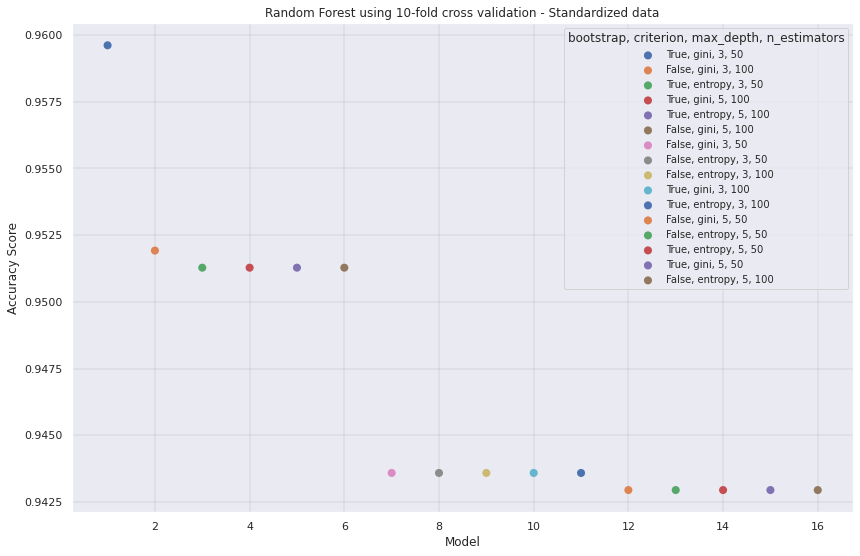

In [33]:
# Tuning algorithm - Random Forest 10-fold CV

for label, X_train, X_test, y_train, y_test in data_to_fit:
    t0 = time.time()
    paramGridRF_cv = dict(n_estimators=np.array([50, 100]),
                          criterion=np.array(["gini", "entropy"]),
                          max_depth=np.array([3, 5]),
                          bootstrap=np.array([False, True]))

    modelRF_cv = RandomForestClassifier(n_jobs=-1, random_state=randNum)
    gridRF_cv = GridSearchCV(estimator=modelRF_cv,
                             param_grid=paramGridRF_cv,
                             cv=kfoldSplit,
                             scoring=scoring,
                             refit='accuracy', 
                             n_jobs=-1)
    grid_result_RF_cv = gridRF_cv.fit(X_train, y_train)

    print("Best score: %f using %s" % (grid_result_RF_cv.best_score_, grid_result_RF_cv.best_params_))
    print("Accuracy score in testing data:", (grid_result_RF_cv.score(X_test, y_test)))
    print ('Model tuning time: %.2fs' % (time.time() - t0))
    show_results(grid_result_RF_cv, 'Random Forest using 10-fold cross validation - ' + label)

### Best model selection

From the tests above we can see that `LinearSVC` classifier produced the best results compared to other classifiers. The best results were produced by using 10-fold cross validation method with stardardized data (using StandardScaler).

Parameters of the best model are: `penalty="l2", max_iter=1e6, C=0.1, fit_intercept=True, random_state=123`

We will fit the `LinearSVC` classifier with all the standardized training data and use this model to predict the testing set for submission.

In [34]:
best_model = LinearSVC(penalty="l2", max_iter=1e6, C=0.1, fit_intercept=True, random_state=randNum).fit(X_ss, y)

We will add the respective `ID-s` to the predicted results and save the dataframe as csv file for submission.

In [35]:
best_model_prediction = best_model.predict(cvoting_test)

In [36]:
submission = pd.DataFrame(data=np.where(best_model_prediction == 0, 'democrat', 'republican'), columns=['class'])
submission['ID'] = test['ID']
submission.set_index('ID', inplace=True)
submission.to_csv('congressional_voting_gr24_submission.csv', sep=",")
print('Submission file saved successfully!')

Submission file saved successfully!
